In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
def AUCount(DNASequence):
    AUCount = 0
    
    for Nucleotide in range(len(DNASequence)):
        if DNASequence[Nucleotide] == 'A' or DNASequence[Nucleotide] == 'U' or DNASequence[Nucleotide] == 'T':
            AUCount += 1

    return AUCount

In [3]:
Translation = {'AAA':'K','AAC':'N','AAG':'K','AAU':'N',
                'ACA':'T','ACC':'T','ACG':'T','ACU':'T',
                'AGA':'R','AGC':'S','AGG':'R','AGU':'S',
                'AUA':'I','AUC':'I','AUG':'M','AUU':'I',
                
                'CAA':'Q','CAC':'H','CAG':'Q','CAU':'H',
                'CCA':'P','CCC':'P','CCG':'P','CCU':'P',
                'CGA':'R','CGC':'R','CGG':'R','CGU':'R',
                'CUA':'L','CUC':'L','CUG':'L','CUU':'L',
                
                'GAA':'E','GAC':'D','GAG':'E','GAU':'D',
                'GCA':'A','GCC':'A','GCG':'A','GCU':'A',
                'GGA':'G','GGC':'G','GGG':'G','GGU':'G',
                'GUA':'V','GUC':'V','GUG':'V','GUU':'V',
                
                'UAA':'ochre','UAC':'Y','UAG':'amber','UAU':'Y',
                'UCA':'S','UCC':'S','UCG':'S','UCU':'S',
                'UGA':'opal','UGC':'C','UGG':'W','UGU':'C',
                'UUA':'L','UUC':'F','UUG':'L','UUU':'F'}

ReverseTranslation = {}

for i in Translation:
    if Translation[i] not in ReverseTranslation:
        ReverseTranslation[Translation[i]] = [i]
    else:
        ReverseTranslation[Translation[i]] += [i]
        

print (ReverseTranslation)
print (ReverseTranslation['A'])
SortedReverseTranslation = sorted(ReverseTranslation)

NNKReverseTranslation = {}

for AminoAcid in SortedReverseTranslation:
    for Codon in ReverseTranslation[AminoAcid]:
        if Codon[2] == 'G' or Codon[2] == 'U':
            if AminoAcid not in NNKReverseTranslation:
                NNKReverseTranslation[AminoAcid] = [Codon]
            else:
                NNKReverseTranslation[AminoAcid] += [Codon]

print (NNKReverseTranslation)
    

{'K': ['AAA', 'AAG'], 'N': ['AAC', 'AAU'], 'T': ['ACA', 'ACC', 'ACG', 'ACU'], 'R': ['AGA', 'AGG', 'CGA', 'CGC', 'CGG', 'CGU'], 'S': ['AGC', 'AGU', 'UCA', 'UCC', 'UCG', 'UCU'], 'I': ['AUA', 'AUC', 'AUU'], 'M': ['AUG'], 'Q': ['CAA', 'CAG'], 'H': ['CAC', 'CAU'], 'P': ['CCA', 'CCC', 'CCG', 'CCU'], 'L': ['CUA', 'CUC', 'CUG', 'CUU', 'UUA', 'UUG'], 'E': ['GAA', 'GAG'], 'D': ['GAC', 'GAU'], 'A': ['GCA', 'GCC', 'GCG', 'GCU'], 'G': ['GGA', 'GGC', 'GGG', 'GGU'], 'V': ['GUA', 'GUC', 'GUG', 'GUU'], 'ochre': ['UAA'], 'Y': ['UAC', 'UAU'], 'amber': ['UAG'], 'opal': ['UGA'], 'C': ['UGC', 'UGU'], 'W': ['UGG'], 'F': ['UUC', 'UUU']}
['GCA', 'GCC', 'GCG', 'GCU']
{'A': ['GCG', 'GCU'], 'C': ['UGU'], 'D': ['GAU'], 'E': ['GAG'], 'F': ['UUU'], 'G': ['GGG', 'GGU'], 'H': ['CAU'], 'I': ['AUU'], 'K': ['AAG'], 'L': ['CUG', 'CUU', 'UUG'], 'M': ['AUG'], 'N': ['AAU'], 'P': ['CCG', 'CCU'], 'Q': ['CAG'], 'R': ['AGG', 'CGG', 'CGU'], 'S': ['AGU', 'UCG', 'UCU'], 'T': ['ACG', 'ACU'], 'V': ['GUG', 'GUU'], 'W': ['UGG'], 'Y': [

In [4]:
Peptide = 'VWDPRTFYLSRI'
CodonsCombinationsList = []
for i in range(len(Peptide)):
    CodonsCombinationsList += [NNKReverseTranslation[Peptide[i]]]

print (CodonsCombinationsList)
print (len(CodonsCombinationsList))
print (len(Peptide))

[['GUG', 'GUU'], ['UGG'], ['GAU'], ['CCG', 'CCU'], ['AGG', 'CGG', 'CGU'], ['ACG', 'ACU'], ['UUU'], ['UAU'], ['CUG', 'CUU', 'UUG'], ['AGU', 'UCG', 'UCU'], ['AGG', 'CGG', 'CGU'], ['AUU']]
12
12


absolutely ingenious piece of code to construct all the possible combinations
http://code.activestate.com/recipes/496807-list-of-all-combination-from-multiple-lists/

In [5]:
CodingDNAsList = ['']
for AminoAcidCodons in CodonsCombinationsList:
    TemporaryDNAsList = []
    for Codon in AminoAcidCodons:
        for i in CodingDNAsList:
            TemporaryDNAsList.append(i + Codon)
    CodingDNAsList = TemporaryDNAsList
print (CodingDNAsList)
print (len(CodingDNAsList))
print ('GUUUGGGAUCCGAGGACGUUUUAUUUGUCUAGGAUU' in CodingDNAsList)
print (len('GUUUGGGAUCCGAGGACGUUUUAUUUGUCUAGGAUU'))


['GUGUGGGAUCCGAGGACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGAGGACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUAGGACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCUAGGACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGGACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGCGGACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUCGGACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCUCGGACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGUACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGCGUACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUCGUACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCUCGUACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGAGGACUUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGAGGACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUAGGACUUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCUAGGACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGGACUUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGCGGACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUCGGACUUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCUCGGACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGUACUUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGCGUACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUCGUACUUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCUCGUACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGAGGACGUUUUAUCUUAGUAGGAUU',

In [6]:
DNAsAUContent = {}
for DNA in CodingDNAsList:
    DNAsAUContent[DNA] = AUCount(DNA)
print (DNAsAUContent)

{'GUGUGGGAUCCGAGGACGUUUUAUCUGAGUAGGAUU': 19, 'GUUUGGGAUCCGAGGACGUUUUAUCUGAGUAGGAUU': 20, 'GUGUGGGAUCCUAGGACGUUUUAUCUGAGUAGGAUU': 20, 'GUUUGGGAUCCUAGGACGUUUUAUCUGAGUAGGAUU': 21, 'GUGUGGGAUCCGCGGACGUUUUAUCUGAGUAGGAUU': 18, 'GUUUGGGAUCCGCGGACGUUUUAUCUGAGUAGGAUU': 19, 'GUGUGGGAUCCUCGGACGUUUUAUCUGAGUAGGAUU': 19, 'GUUUGGGAUCCUCGGACGUUUUAUCUGAGUAGGAUU': 20, 'GUGUGGGAUCCGCGUACGUUUUAUCUGAGUAGGAUU': 19, 'GUUUGGGAUCCGCGUACGUUUUAUCUGAGUAGGAUU': 20, 'GUGUGGGAUCCUCGUACGUUUUAUCUGAGUAGGAUU': 20, 'GUUUGGGAUCCUCGUACGUUUUAUCUGAGUAGGAUU': 21, 'GUGUGGGAUCCGAGGACUUUUUAUCUGAGUAGGAUU': 20, 'GUUUGGGAUCCGAGGACUUUUUAUCUGAGUAGGAUU': 21, 'GUGUGGGAUCCUAGGACUUUUUAUCUGAGUAGGAUU': 21, 'GUUUGGGAUCCUAGGACUUUUUAUCUGAGUAGGAUU': 22, 'GUGUGGGAUCCGCGGACUUUUUAUCUGAGUAGGAUU': 19, 'GUUUGGGAUCCGCGGACUUUUUAUCUGAGUAGGAUU': 20, 'GUGUGGGAUCCUCGGACUUUUUAUCUGAGUAGGAUU': 20, 'GUUUGGGAUCCUCGGACUUUUUAUCUGAGUAGGAUU': 21, 'GUGUGGGAUCCGCGUACUUUUUAUCUGAGUAGGAUU': 20, 'GUUUGGGAUCCGCGUACUUUUUAUCUGAGUAGGAUU': 21, 'GUGUGGGAUCCUCGUACUUUUUAUCUGAGU

In [7]:
MinDNAsAUContent = min([i for i in DNAsAUContent.values()])
MaxDNAsAUContent = max([i for i in DNAsAUContent.values()])

#MaxMaxDNAsAUContentSequence = [max(DNAsAUContent, key=DNAsAUContent.get)]
MaxDNAsAUContentSequences = []
for CodingDNA in DNAsAUContent:
    if DNAsAUContent[CodingDNA] == MaxDNAsAUContent:
        MaxDNAsAUContentSequences += [CodingDNA]

print (MaxDNAsAUContentSequences)
print (len(MaxDNAsAUContentSequences))

['GUUUGGGAUCCUAGGACUUUUUAUCUUAGUAGGAUU', 'GUUUGGGAUCCUCGUACUUUUUAUCUUAGUAGGAUU', 'GUUUGGGAUCCUAGGACUUUUUAUUUGAGUAGGAUU', 'GUUUGGGAUCCUCGUACUUUUUAUUUGAGUAGGAUU', 'GUUUGGGAUCCUAGGACUUUUUAUCUUUCUAGGAUU', 'GUUUGGGAUCCUCGUACUUUUUAUCUUUCUAGGAUU', 'GUUUGGGAUCCUAGGACUUUUUAUUUGUCUAGGAUU', 'GUUUGGGAUCCUCGUACUUUUUAUUUGUCUAGGAUU', 'GUUUGGGAUCCUAGGACUUUUUAUCUUAGUCGUAUU', 'GUUUGGGAUCCUCGUACUUUUUAUCUUAGUCGUAUU', 'GUUUGGGAUCCUAGGACUUUUUAUUUGAGUCGUAUU', 'GUUUGGGAUCCUCGUACUUUUUAUUUGAGUCGUAUU', 'GUUUGGGAUCCUAGGACUUUUUAUCUUUCUCGUAUU', 'GUUUGGGAUCCUCGUACUUUUUAUCUUUCUCGUAUU', 'GUUUGGGAUCCUAGGACUUUUUAUUUGUCUCGUAUU', 'GUUUGGGAUCCUCGUACUUUUUAUUUGUCUCGUAUU']
16


In [8]:
print ('GUUUGGGAUCCGAGGACGUUUUAUUUGUCUAGGAUU' in MaxDNAsAUContentSequences)
print ('GUUUGGGAUCCGAGGACGUUUUAUUUGUCUAGGAUU' in CodingDNAsList)
print ('AATGCGGCTCAGATAAAAGGTGCGCGGATCCCACAC' in CodingDNAsList)

False
True
False


In [9]:
AUCountDistribution = {}
for DNA in DNAsAUContent:
    if DNAsAUContent[DNA] not in AUCountDistribution:
        AUCountDistribution[DNAsAUContent[DNA]] = 1
    else:
        AUCountDistribution[DNAsAUContent[DNA]] += 1

print (AUCountDistribution)
print (AUCountDistribution.keys())
print (AUCountDistribution.values())

{19: 129, 20: 192, 21: 168, 18: 51, 22: 80, 23: 16, 17: 11, 16: 1}
dict_keys([19, 20, 21, 18, 22, 23, 17, 16])
dict_values([129, 192, 168, 51, 80, 16, 11, 1])


In [10]:
DNAsByAUCount = {}
for DNA in DNAsAUContent:
    if DNAsAUContent[DNA] not in DNAsByAUCount:
        DNAsByAUCount[DNAsAUContent[DNA]] = [DNA]
    else:
        DNAsByAUCount[DNAsAUContent[DNA]] += [DNA]

print (DNAsByAUCount)

{19: ['GUGUGGGAUCCGAGGACGUUUUAUCUGAGUAGGAUU', 'GUUUGGGAUCCGCGGACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCUCGGACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGUACGUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGGACUUUUUAUCUGAGUAGGAUU', 'GUGUGGGAUCCGCGGACGUUUUAUCUUAGUAGGAUU', 'GUGUGGGAUCCGCGGACGUUUUAUUUGAGUAGGAUU', 'GUUUGGGAUCCGAGGACGUUUUAUCUGUCGAGGAUU', 'GUGUGGGAUCCUAGGACGUUUUAUCUGUCGAGGAUU', 'GUUUGGGAUCCUCGGACGUUUUAUCUGUCGAGGAUU', 'GUUUGGGAUCCGCGUACGUUUUAUCUGUCGAGGAUU', 'GUGUGGGAUCCUCGUACGUUUUAUCUGUCGAGGAUU', 'GUGUGGGAUCCGAGGACUUUUUAUCUGUCGAGGAUU', 'GUUUGGGAUCCGCGGACUUUUUAUCUGUCGAGGAUU', 'GUGUGGGAUCCUCGGACUUUUUAUCUGUCGAGGAUU', 'GUGUGGGAUCCGCGUACUUUUUAUCUGUCGAGGAUU', 'GUGUGGGAUCCGAGGACGUUUUAUCUUUCGAGGAUU', 'GUUUGGGAUCCGCGGACGUUUUAUCUUUCGAGGAUU', 'GUGUGGGAUCCUCGGACGUUUUAUCUUUCGAGGAUU', 'GUGUGGGAUCCGCGUACGUUUUAUCUUUCGAGGAUU', 'GUGUGGGAUCCGCGGACUUUUUAUCUUUCGAGGAUU', 'GUGUGGGAUCCGAGGACGUUUUAUUUGUCGAGGAUU', 'GUUUGGGAUCCGCGGACGUUUUAUUUGUCGAGGAUU', 'GUGUGGGAUCCUCGGACGUUUUAUUUGUCGAGGAUU', 'GUGUGGGAUCCGCGUACGUUUUAUUUGUCGAGG

In [11]:
RandomDNAClonesByAUContent = {}
for AUContent in DNAsByAUCount:
    RandomDNAClonesByAUContent[AUContent] = random.choice(DNAsByAUCount[AUContent])

print (RandomDNAClonesByAUContent)

{19: 'GUGUGGGAUCCGCGUACGUUUUAUCUGUCUAGGAUU', 20: 'GUUUGGGAUCCGCGGACUUUUUAUUUGUCGCGUAUU', 21: 'GUGUGGGAUCCGAGGACUUUUUAUUUGAGUCGUAUU', 18: 'GUGUGGGAUCCGCGUACUUUUUAUCUGUCGCGGAUU', 22: 'GUGUGGGAUCCUCGUACUUUUUAUCUUUCUCGUAUU', 23: 'GUUUGGGAUCCUCGUACUUUUUAUCUUAGUCGUAUU', 17: 'GUGUGGGAUCCGAGGACGUUUUAUCUGUCGCGGAUU', 16: 'GUGUGGGAUCCGCGGACGUUUUAUCUGUCGCGGAUU'}


In [12]:
def ComplementarySequence(String):
    DNAComplement = {'A':'T','C':'G','G':'C','T':'A'}
    RNAComplement = {'A':'U','C':'G','G':'C','U':'A'}
    
    ComplementarySequence = ''
    
    if 'T' in String:
        for i in range(len(String)):
            ComplementarySequence = ComplementarySequence + DNAComplement[String[i]]
    elif 'U' in String:
        for i in range(len(String)):
            ComplementarySequence = ComplementarySequence + RNAComplement[String[i]]
    return ComplementarySequence

In [13]:
def ReverseSequence(String):
    ReverseSequence = ''
    i = len(String) - 1
    while i >= 0:
        ReverseSequence = ReverseSequence + String[i]
        i -= 1
    return ReverseSequence

In [14]:
RandomPrimers = {}

FirstBit = 'GCTGCCGCTGCCGCTGCCGCA'
LastBit = 'CATATGTATATCTCCTTCTTAAAG'
for AUContent in RandomDNAClonesByAUContent:
    ReverseComplementRandomBit = ReverseSequence(ComplementarySequence(RandomDNAClonesByAUContent[AUContent]))
    RandomPrimers[AUContent] = FirstBit + ReverseComplementRandomBit + LastBit
    
print (RandomPrimers)

{19: 'GCTGCCGCTGCCGCTGCCGCAAAUCCUAGACAGAUAAAACGUACGCGGAUCCCACACCATATGTATATCTCCTTCTTAAAG', 20: 'GCTGCCGCTGCCGCTGCCGCAAAUACGCGACAAAUAAAAAGUCCGCGGAUCCCAAACCATATGTATATCTCCTTCTTAAAG', 21: 'GCTGCCGCTGCCGCTGCCGCAAAUACGACUCAAAUAAAAAGUCCUCGGAUCCCACACCATATGTATATCTCCTTCTTAAAG', 18: 'GCTGCCGCTGCCGCTGCCGCAAAUCCGCGACAGAUAAAAAGUACGCGGAUCCCACACCATATGTATATCTCCTTCTTAAAG', 22: 'GCTGCCGCTGCCGCTGCCGCAAAUACGAGAAAGAUAAAAAGUACGAGGAUCCCACACCATATGTATATCTCCTTCTTAAAG', 23: 'GCTGCCGCTGCCGCTGCCGCAAAUACGACUAAGAUAAAAAGUACGAGGAUCCCAAACCATATGTATATCTCCTTCTTAAAG', 17: 'GCTGCCGCTGCCGCTGCCGCAAAUCCGCGACAGAUAAAACGUCCUCGGAUCCCACACCATATGTATATCTCCTTCTTAAAG', 16: 'GCTGCCGCTGCCGCTGCCGCAAAUCCGCGACAGAUAAAACGUCCGCGGAUCCCACACCATATGTATATCTCCTTCTTAAAG'}


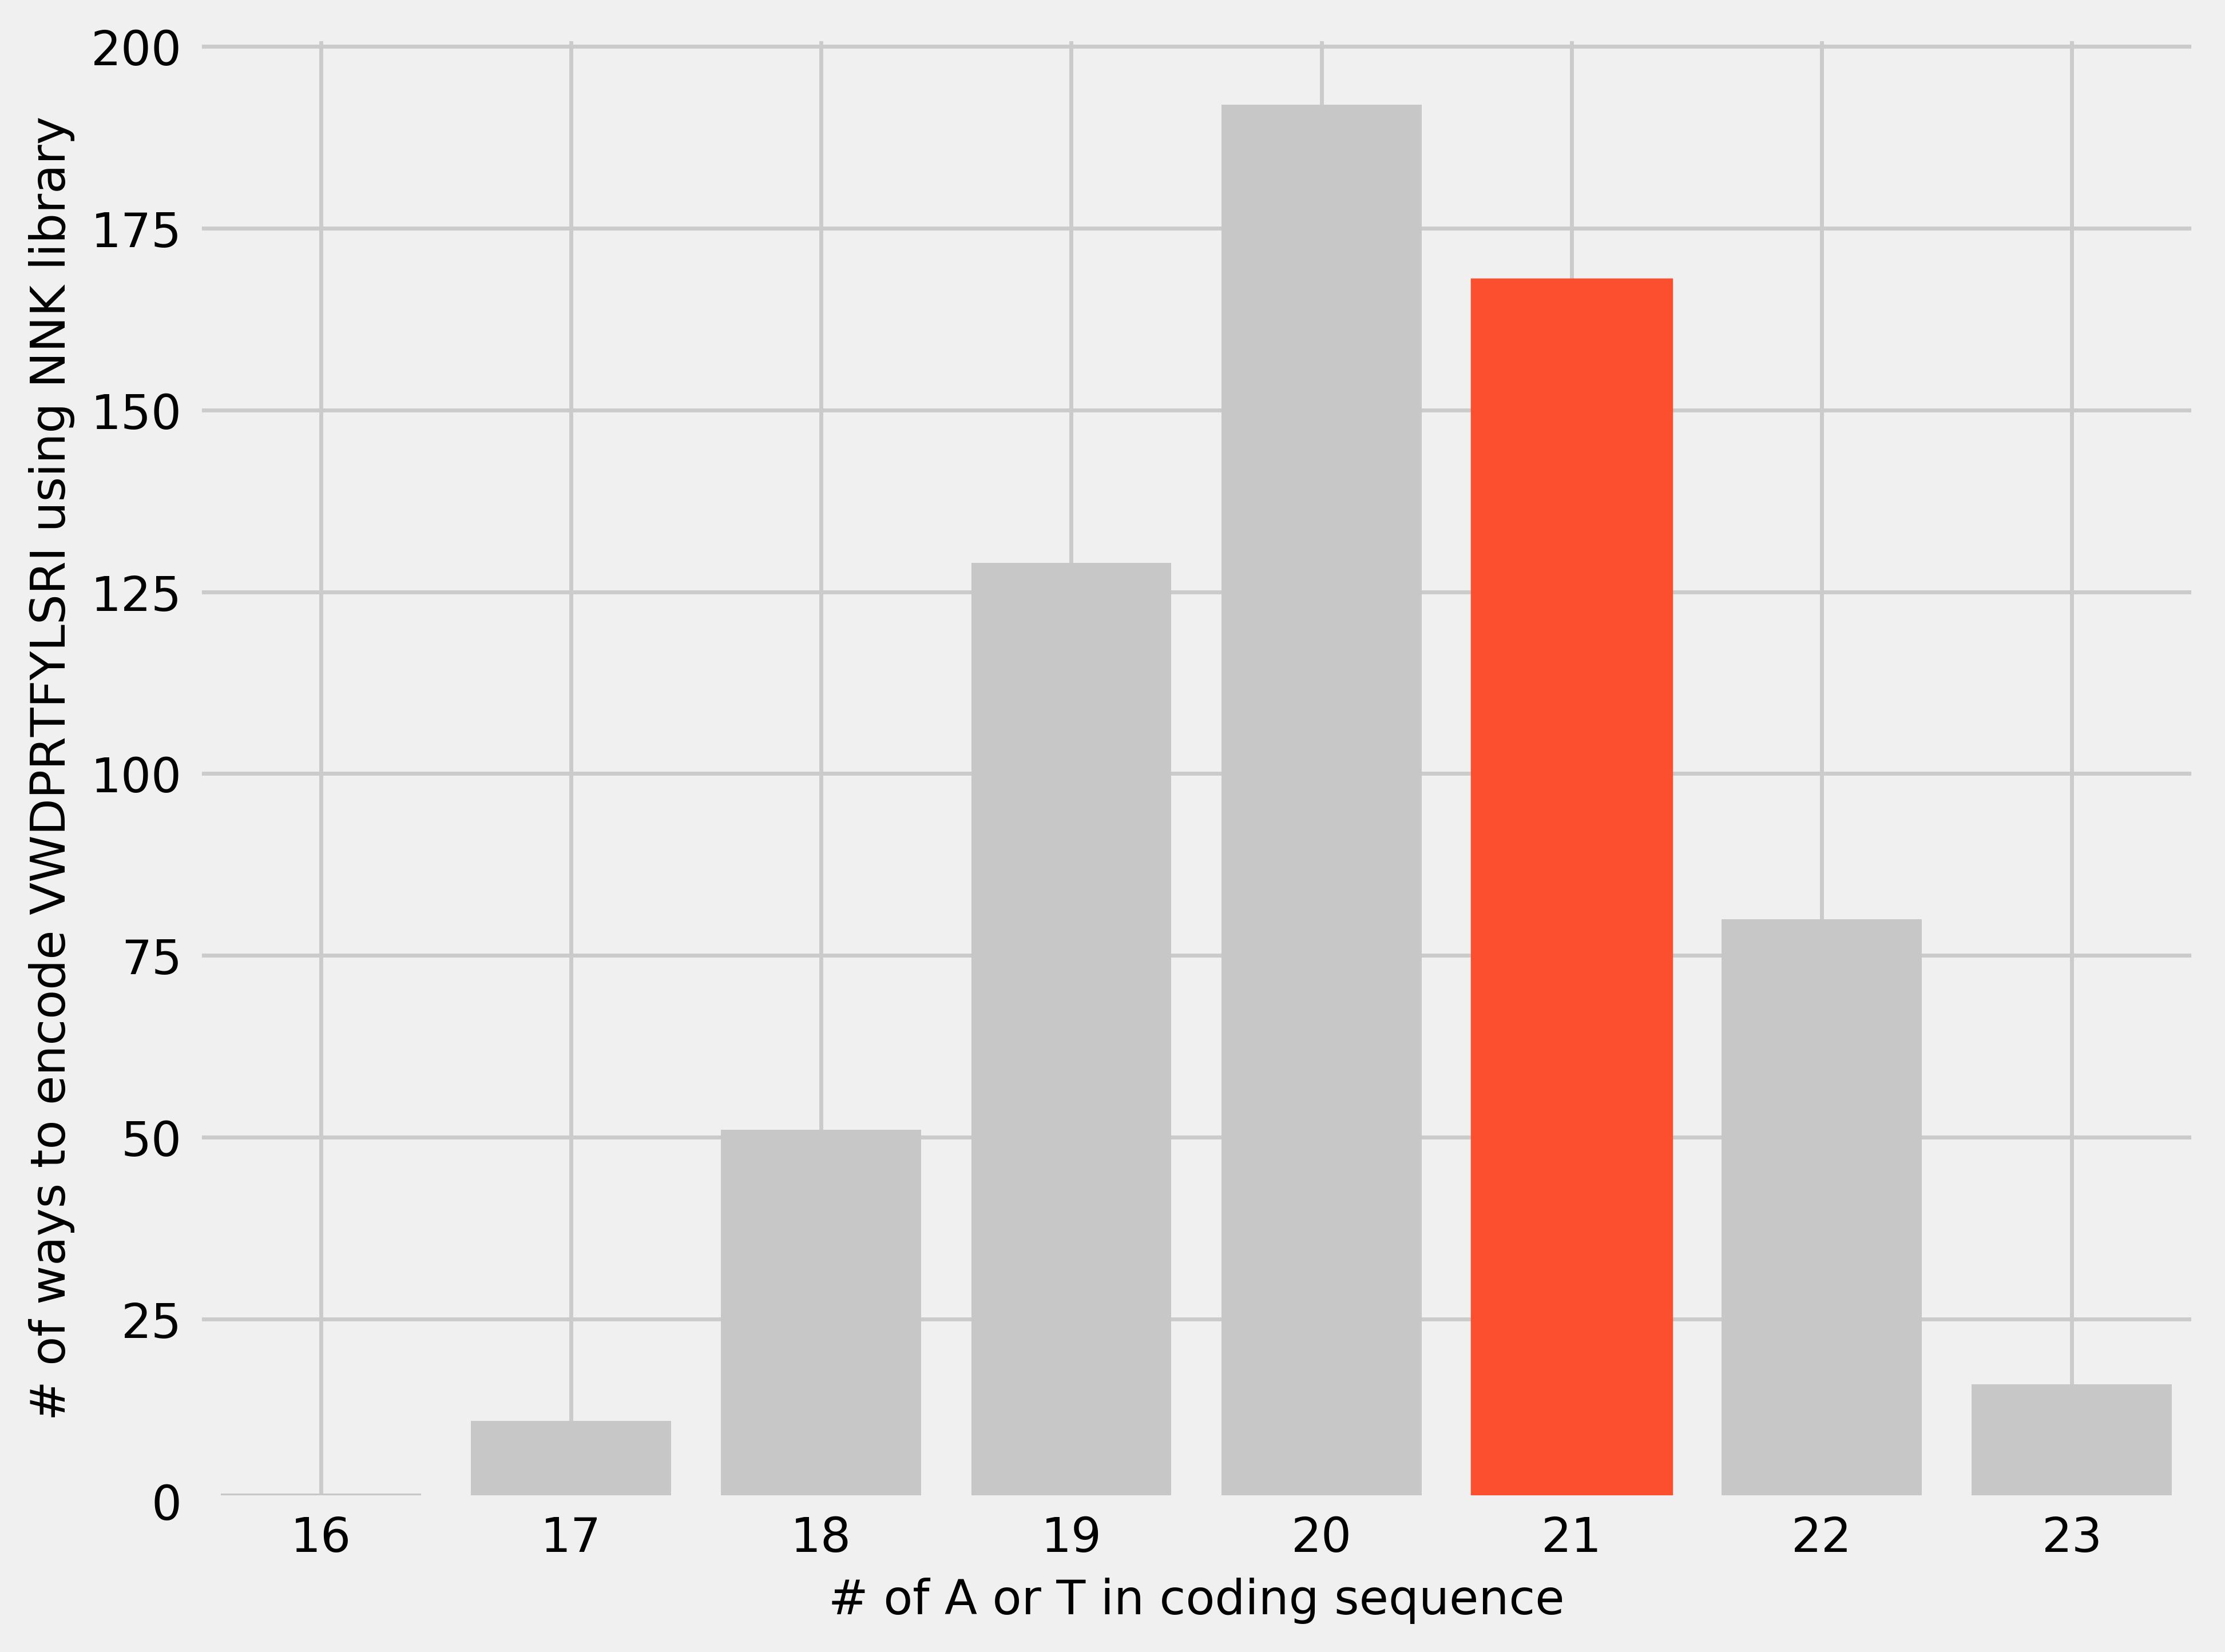

In [24]:
plt.figure(figsize = (8, 6),
           dpi = 500)
# Create 'ggplot' style
plt.style.use('fivethirtyeight')
# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)


x = [16, 17, 18, 19, 20, 21, 22, 23]
y = [1, 11, 51, 129, 192, 168, 80, 16]
histogram = plt.bar(x, y,
                    align='center',
                    color = '#C7C7C7')
histogram[5].set_color('#fc4f30')


plt.xlim(15.5, 23.5)
plt.xlabel('# of A or T in coding sequence', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('# of ways to encode VWDPRTFYLSRI using NNK library', fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('NNKLibrarySequencesEncodingVWDPRTFYLSRINDistribution.png',
            bbox_inches = 'tight',
            dpi = 300)

plt.tight_layout()
plt.show()
plt.close()

In [16]:
OriginalSequence = 'GUUUGGGAUCCGAGGACGUUUUAUUUGUCUAGGAUU'
AlaScanSequence = 'AATGCGGCTCAGATAAAAGGTGCGCGGATCCCACAC'
print (AUCount(OriginalSequence))
print (AUCount(AlaScanSequence))

21
16


In [17]:
print (NNKReverseTranslation)
NNKCodonsAUCount = []
for AminoAcid in NNKReverseTranslation:
    for Codon in NNKReverseTranslation[AminoAcid]:
        NNKCodonsAUCount += [AUCount(Codon)]
print (len(NNKCodonsAUCount))
print (NNKCodonsAUCount)
AverageATCount = sum(NNKCodonsAUCount)/len(NNKCodonsAUCount)
print (AverageATCount)

{'A': ['GCG', 'GCU'], 'C': ['UGU'], 'D': ['GAU'], 'E': ['GAG'], 'F': ['UUU'], 'G': ['GGG', 'GGU'], 'H': ['CAU'], 'I': ['AUU'], 'K': ['AAG'], 'L': ['CUG', 'CUU', 'UUG'], 'M': ['AUG'], 'N': ['AAU'], 'P': ['CCG', 'CCU'], 'Q': ['CAG'], 'R': ['AGG', 'CGG', 'CGU'], 'S': ['AGU', 'UCG', 'UCU'], 'T': ['ACG', 'ACU'], 'V': ['GUG', 'GUU'], 'W': ['UGG'], 'Y': ['UAU'], 'amber': ['UAG']}
32
[0, 1, 2, 2, 1, 3, 0, 1, 2, 3, 2, 1, 2, 2, 2, 3, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 2]
1.5
